<a href="https://colab.research.google.com/github/Mohd-jibrail/Pyspark_DS_Projects/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=00c387eaf81a70c35c5478b66ce7bf6798afdc209ead3d9ad01361ebd869ab08
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


# Project Name - Airbnb Bookings Analysis

### Project Type - Exploratory Data Analysis (EDA) in Pyspark

###Contribution - Individual

###Name - Mohd Jibrail



Project Summary -
- The purpose of the analysis: understanding the factors that influence Airbnb prices in New York City, or identifying patterns of all variables and Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business.

- This project involved exploring and cleaning a dataset to prepare it for analysis. The data exploration process involved identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values. The data cleaning process involved identifying and addressing any issues or inconsistencies in the data, such as errors, missing values, or duplicate records and remove outliers.

- Through this process, we were able to identify and fix any issues with the data, and ensure that it was ready for further analysis. This is an important step in any data analysis project, as it allows us to work with high-quality data and avoid any potential biases or errors that could affect the results. The clean and prepared data can now be used to answer specific research.

- Once the data has been cleaned and prepared, now begin exploring and summarizing it with describe the data and creating visualizations, and identifying patterns and trends in the data. in explore the data, may develop the relationships between different variables or the underlying causes of certain patterns or trends and other methods.

- using data visualization to explore and understand patterns in Airbnb data. We created various graphs and charts to visualize the data, and wrote observations and insights below each one to help us better understand the data and identify useful insights and patterns.

- Through this process, we were able to uncover trends and relationships in the data that would have been difficult to identify through raw data alone, for example factors affecting prices and availability. We found that minimum nights, number of reviews, and host listing count are important for determining prices, and that availability varies significantly across neighborhoods. Our analysis provides useful information for travelers and hosts in the city.

- The observations and insights we identified through this process will be useful for future analysis and decision-making related to Airbnb. and also Our analysis provides useful information for travelers and hosts in the city.

Problem Statements -

1. What are the most popular neighborhoods for Airbnb rentals in New York City? How do prices and availability vary by neighborhood?

2. How has the Airbnb market in New York City changed over time? Have there been any significant trends in terms of the number of listings, prices, or occupancy rates?

3. Are there any patterns or trends in terms of the types of properties that are being rented out on Airbnb in New York City? Are certain types of properties more popular or more expensive than others?

4. Are there any factors that seem to be correlated with the prices of Airbnb rentals in New York City?

5. the best area in New York City for a host to buy property at a good price rate and in an area with high traffic ?

6. How do the lengths of stay for Airbnb rentals in New York City vary by neighborhood? Do certain neighborhoods tend to attract longer or shorter stays?

7. How do the ratings of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?

8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

9. Find Most reviewed room type in Neighborhood groups per month.

10. Find Best location listing/property location for travelers.

11. Find also best location listing/property location for Hosts.

12. Find Price variations in NYC Neighborhood groups.

there is a lot of problem statements and we have to finds information and insights through different different problem statements so now lets start...

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [5]:
spark = SparkSession.builder.appName('airbnb').getOrCreate()

In [33]:
airbnb_schema = StructType([
    StructField('id', StringType(), True),
    StructField('name', StringType(), True),
    StructField('host_id', StringType(), True),
    StructField('host_name', StringType(), True),
    StructField('neighbourhood_group', StringType(), True),
    StructField('neighbourhood', StringType(), True),
    StructField('latitude', FloatType(), True),
    StructField('longitude', FloatType(), True),
    StructField('room_type', StringType(), True),
    StructField('price', FloatType(), True),
    StructField('minimum_nights', IntegerType(), True),
    StructField('number_of_reviews', IntegerType(), True),
    StructField('last_review', DateType(), True),
    StructField('reviews_per_month', FloatType(), True),
    StructField('calculated_host_listings_count', IntegerType(), True),
    StructField('availability_365', IntegerType(), True)
])

In [34]:
'''
If we read data without applying the schema and we want to apply it after reading the file,
we can apply that in this commented way...

airbnb_df = spark.createDataFrame(airbnb_df.rdd, schema=airbnb_schema)
'''
airbnb_df = spark.read.csv('/content/Airbnb_NYC_2019.csv', header=True, schema=airbnb_schema)

In [36]:
airbnb_df.limit(3).toPandas().T

,0,1,2
id,28918768,28918915,28919308
name,living room space but with curtain for privacy,B2. Shared room for 4-5 guests,Charming West Chelsea Studio Loft
host_id,35927005,215588687,145331404
host_name,Kathy,Levi,Allan
neighbourhood_group,Brooklyn,Brooklyn,Manhattan
neighbourhood,Borough Park,Prospect-Lefferts Gardens,Chelsea
latitude,40.63522,40.660759,40.745419
longitude,-74.005959,-73.945473,-74.001328
room_type,Shared room,Shared room,Entire home/apt
price,35.0,30.0,195.0


##About the Dataset – Airbnb Bookings
- This Airbnb dataset contains nearly 7,000 observations from New York , with 16 columns of data.

- The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

- This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

- This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

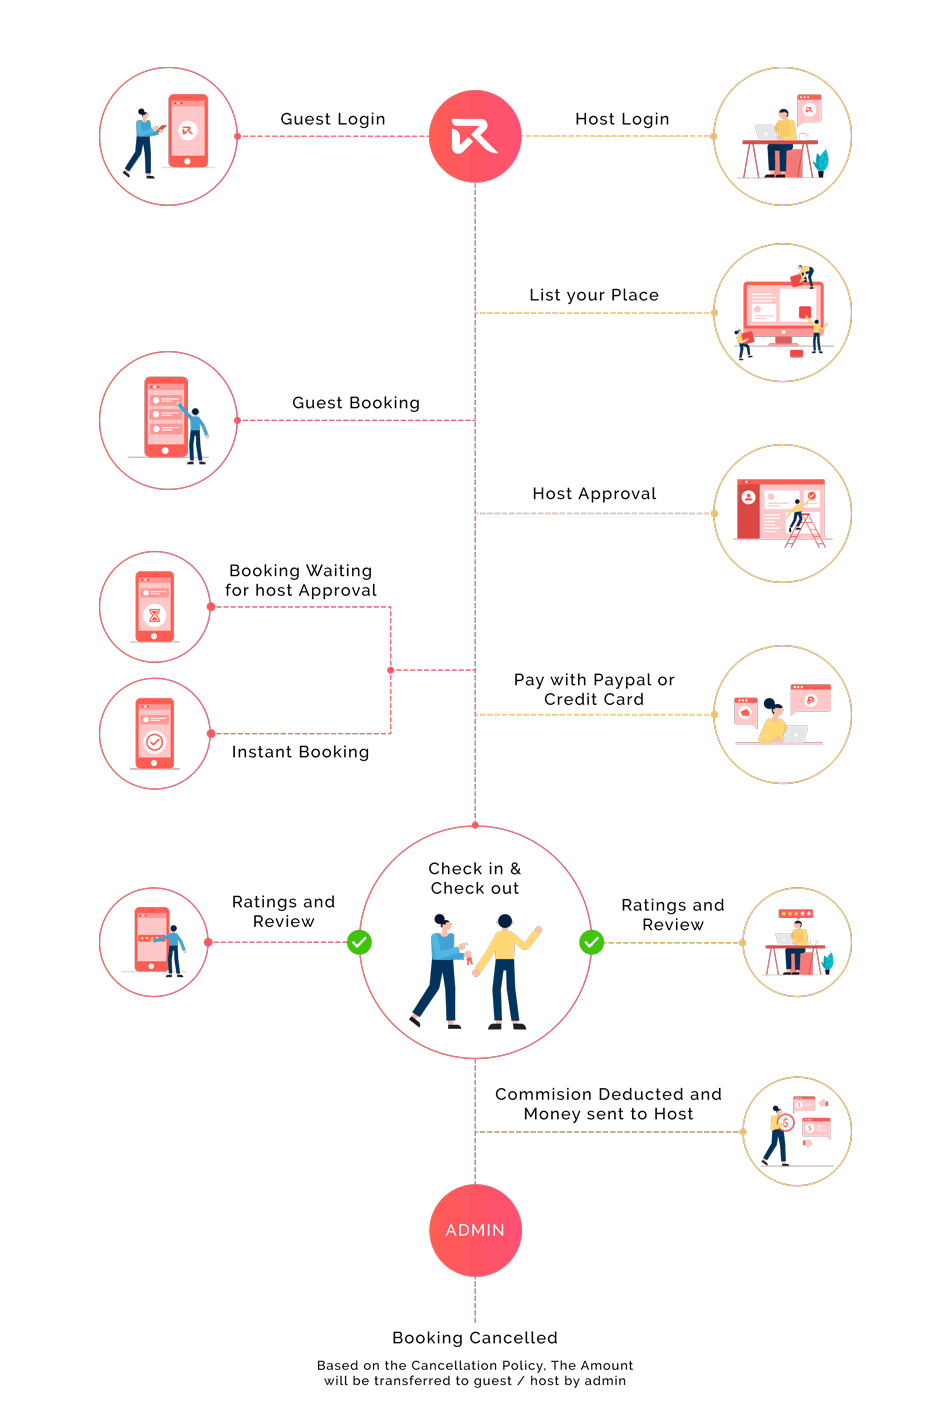

UNDERSTAND THE GIVEN VARIABLES

**Listing_id :**- This is a unique identifier for each listing in the dataset.

**Listing_name :**- This is the name or title of the listing, as it appears on the Airbnb website.

**Host_id :**- This is a unique identifier for each host in the dataset.

**Host_name :**- This is the name of the host as it appears on the Airbnb website.

**Neighbourhood_group :**- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**Neighbourhood :**- This is the specific neighborhood in which the listing is located.

**Latitude :**- This is the geographic latitude of the listing.

**Longitude :**- This is the geographic longitude of the listing.

**Room_type :**- This is the type of room or property being offered, such as an entire home, private room, shared room.

**Price :**- This is the nightly price for the listing, in US dollars.

**Minimum_nights :**- This is the minimum number of nights that a guest must stay at the listing.

**Total_reviews :**- This is the total number of reviews that the listing has received.

**Reviews_per_month :**- This is the average number of reviews that the listing receives per month.

**Host_listings_count :**- This is the total number of listings that the host has on Airbnb.

**Availability_365 :**- This is the number of days in the next 365 days that the listing is available for booking.

#Data Exploration and Data Cleaning

In [37]:
airbnb_df.limit(3).toPandas().T

,0,1,2
id,28918768,28918915,28919308
name,living room space but with curtain for privacy,B2. Shared room for 4-5 guests,Charming West Chelsea Studio Loft
host_id,35927005,215588687,145331404
host_name,Kathy,Levi,Allan
neighbourhood_group,Brooklyn,Brooklyn,Manhattan
neighbourhood,Borough Park,Prospect-Lefferts Gardens,Chelsea
latitude,40.63522,40.660759,40.745419
longitude,-74.005959,-73.945473,-74.001328
room_type,Shared room,Shared room,Entire home/apt
price,35.0,30.0,195.0


In [38]:
airbnb_df.columns

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [39]:
print("Number of rows: ", airbnb_df.count())
print("Number of columns: ", len(airbnb_df.columns))

Number of rows:  7137
Number of columns:  16


- so now first rename few columns for better understanding of variables -

In [43]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

# Iterate through the dictionary to rename columns
for existing, new in rename_col.items():
    airbnb_df = airbnb_df.withColumnRenamed(existing, new)

airbnb_df.printSchema()

root
 |-- listing_id: string (nullable = true)
 |-- listing_name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: float (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- total_reviews: integer (nullable = true)
 |-- last_review: date (nullable = true)
 |-- reviews_per_month: float (nullable = true)
 |-- host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



In [48]:
'''
original_cols = ['id', 'name', 'number_of_reviews', 'calculated_host_listings_count']
new_cols = ['listing_id', 'listing_name', 'total_reviews', 'host_listings_count']

# Use zip to pair the columns and rename using selectExpr
airbnb_df = airbnb_df.selectExpr([f"`{old}` as `{new}`" for old, new in zip(original_cols, new_cols)])

airbnb_df.printSchema()

'''
print((airbnb_df.count(), len(airbnb_df.columns)))

(7137, 16)


So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.


While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables



In [50]:
# Define categorical columns and numerical columns
categorical_cols = ["host_name", "neighbourhood_group", "neighbourhood", "room_type"]
numerical_cols = ["host_id", "latitude", "longitude", "price", "minimum_nights",
                 "total_reviews", "last_review", "reviews_per_month",  # Use 'total_reviews'
                 "host_listings_count", "availability_365"]

# Cast categorical columns to StringType
for col in categorical_cols:
    airbnb_df = airbnb_df.withColumn(col, airbnb_df[col].cast("string")) # Use string instead of StringType()

# Cast numerical columns to appropriate types
for col in numerical_cols:
    if col in ["latitude", "longitude", "reviews_per_month"]:
        airbnb_df = airbnb_df.withColumn(col, airbnb_df[col].cast("double")) # Use double instead of DoubleType()
    else:
        airbnb_df = airbnb_df.withColumn(col, airbnb_df[col].cast("integer")) # Use integer instead of IntegerType()

airbnb_df.printSchema()

root
 |-- listing_id: string (nullable = true)
 |-- listing_name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- total_reviews: integer (nullable = true)
 |-- last_review: integer (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



In [60]:
from pyspark.sql import functions as F

# Group by all columns and count occurrences
duplicate_counts = airbnb_df.groupBy(airbnb_df.columns).count().withColumnRenamed("count", "duplicate_count") # Rename count column to avoid ambiguity

# Join airbnb_df with duplicate_counts
airbnb_df = airbnb_df.join(duplicate_counts, airbnb_df.columns, "left")

# Add a column indicating whether a row is a duplicate
airbnb_df = airbnb_df.withColumn("is_duplicate", F.when(duplicate_counts["duplicate_count"] > 1, True).otherwise(False)) # Refer to renamed column

# Show rows that are duplicates
airbnb_df.filter("is_duplicate").show()

AnalysisException: [AMBIGUOUS_REFERENCE] Reference `count` is ambiguous, could be: [`count`, `count`].